#  <h1 style="text-align:center;">Lab-Assignment - 8</h1>

Aim: To apply the K-means clustering algorithm on a data set of customer transactions and segment the customers into different groups based on their spending patterns.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Exercise 1

* Load the data set and perform some exploratory data analysis. Plot the distributions of the features and check for missing values or outliers. 

In [2]:
df = pd.read_csv(r"C:\Users\raval\Downloads\Customers- K means.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# checking missing values

missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


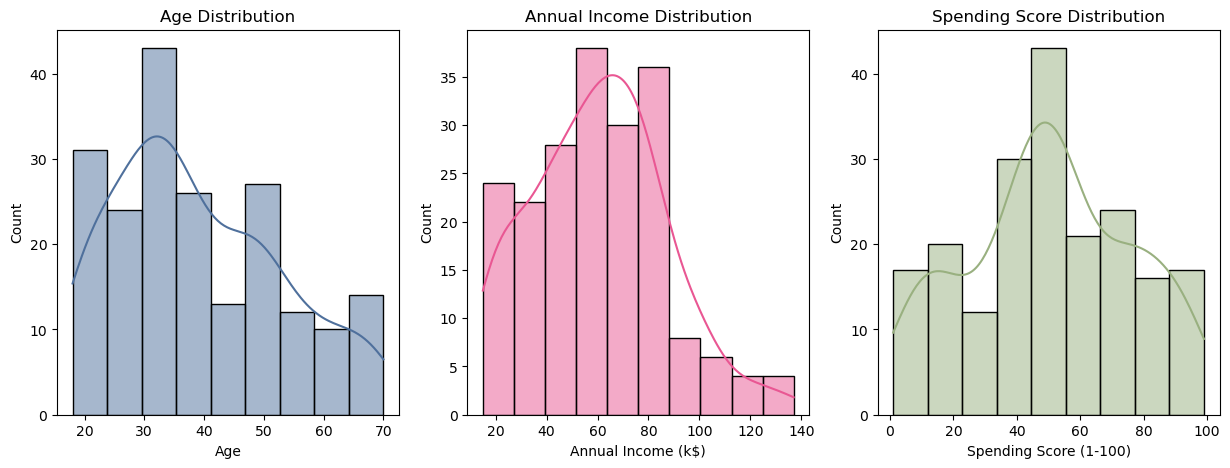

In [5]:
plt.figure(figsize=(15, 5))

# Age distribution
plt.subplot(131)
sns.histplot(df['Age'], kde=True, color='#4F709C')
plt.title('Age Distribution')

# Annual Income distribution
plt.subplot(132)
sns.histplot(df['Annual Income (k$)'], kde=True, color='#E95793')
plt.title('Annual Income Distribution')

# Spending Score distribution
plt.subplot(133)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='#99B080')
plt.title('Spending Score Distribution')

plt.show()

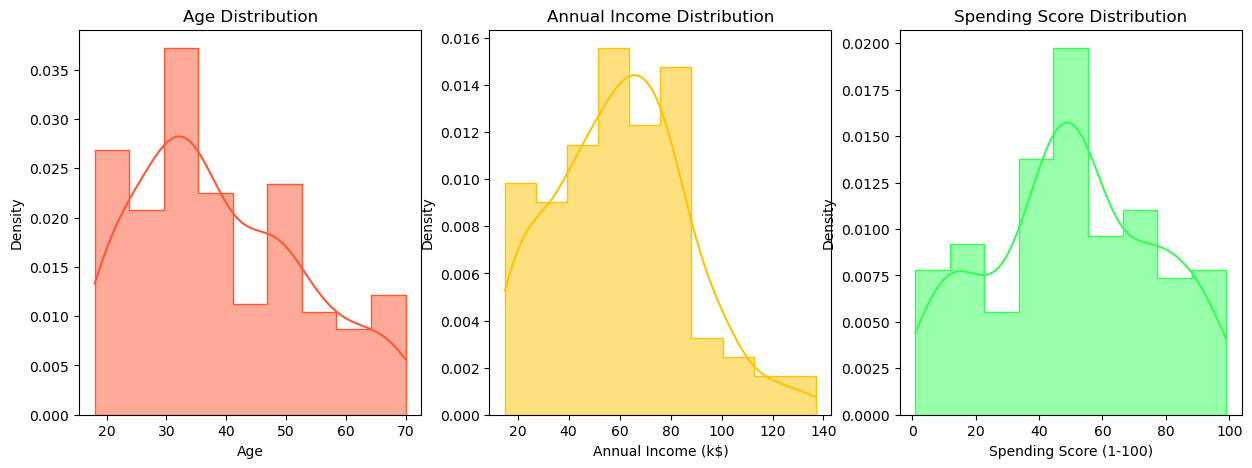

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Age distribution
plt.subplot(131)
sns.histplot(df['Age'], kde=True, color='#FF5733', element="step", stat="density")
plt.title('Age Distribution')

# Annual Income distribution
plt.subplot(132)
sns.histplot(df['Annual Income (k$)'], kde=True, color='#FFC300', element="step", stat="density")
plt.title('Annual Income Distribution')

# Spending Score distribution
plt.subplot(133)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='#33FF57', element="step", stat="density")
plt.title('Spending Score Distribution')

plt.show()


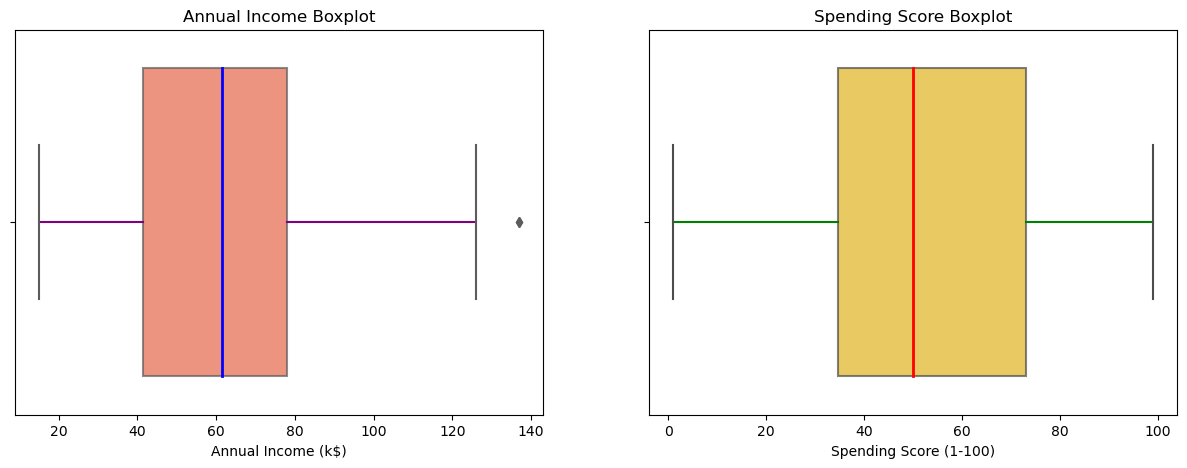

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Box plot for Annual Income
plt.subplot(121)
sns.boxplot(x=df['Annual Income (k$)'], color='#FF5733', boxprops=dict(alpha=0.7), whiskerprops=dict(linewidth=1.5, color='purple'), medianprops=dict(linewidth=2, color='blue'))
plt.title('Annual Income Boxplot')

# Box plot for Spending Score
plt.subplot(122)
sns.boxplot(x=df['Spending Score (1-100)'], color='#FFC300', boxprops=dict(alpha=0.7), whiskerprops=dict(linewidth=1.5, color='green'), medianprops=dict(linewidth=2, color='red'))
plt.title('Spending Score Boxplot')

plt.show()

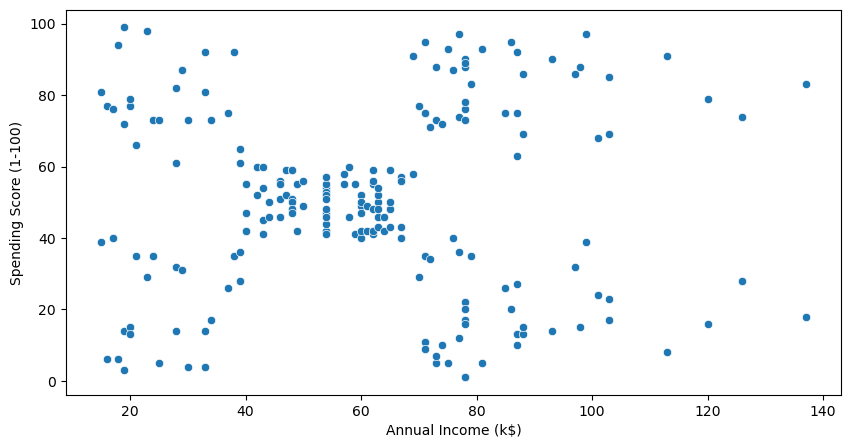

In [8]:
# scatter plot

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.show()

#### Exercise 2

* Choose a value for K, the number of clusters. You can use following methods to determine the optimal value of K, such as the elbow method, the silhouette method, or your own intuition. 

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings

In [10]:
# scaling data

scaler = MinMaxScaler()

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,0.387755
1,2,Male,0.057692,0.000000,0.816327
2,3,Female,0.038462,0.008197,0.051020
3,4,Female,0.096154,0.008197,0.775510
4,5,Female,0.250000,0.016393,0.397959


In [12]:
# elbow method to find k

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)
    
warnings.resetwarnings()

In [13]:
sse

[23.040720326039903,
 13.993505283127977,
 9.058985215159455,
 6.110312266413656,
 3.583117905952561,
 3.100666377684788,
 2.624103948396721,
 2.2168818321158827,
 1.873434667867071]

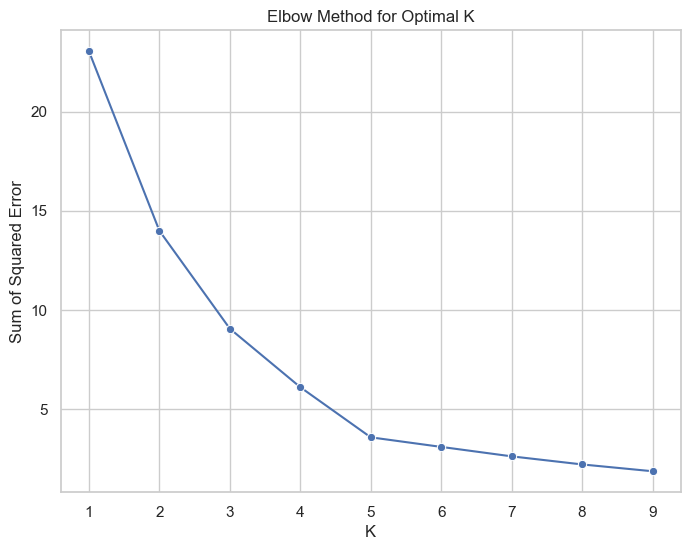

In [14]:
plt.figure(figsize=(8, 6))

sns.set(style='whitegrid')
sns.lineplot(x=k_rng, y=sse, marker='o', color='b')

plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Method for Optimal K')

plt.show()

In [15]:
# silhouette method

from sklearn.metrics import silhouette_score

In [16]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])    
    score = silhouette_score(df[['Annual Income (k$)','Spending Score (1-100)']], labels)
    silhouette_scores.append(score)
    
warnings.resetwarnings()

In [17]:
silhouette_scores

[0.33340205479521,
 0.4514909309424474,
 0.49620078745146784,
 0.5594854531227246,
 0.5377658512956012,
 0.5178198763321877,
 0.4311976192703297,
 0.4421802291750491,
 0.44495438121268266]

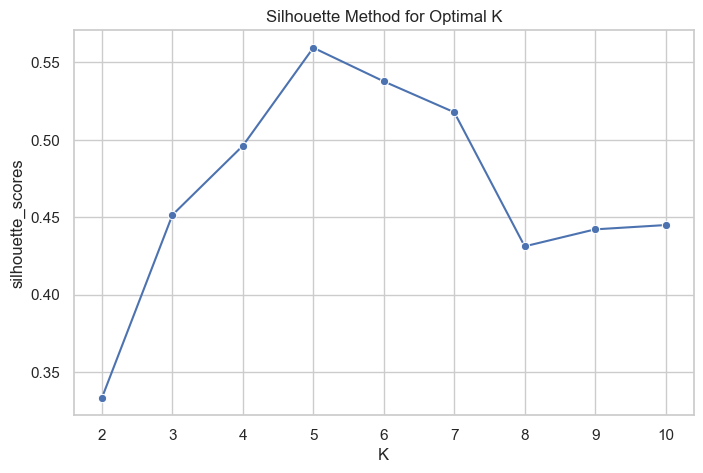

In [18]:
plt.figure(figsize=(8, 5))

sns.set(style='whitegrid')
sns.lineplot(x=range(2, 11), y=silhouette_scores, marker='o', color='b')

plt.xlabel('K')
plt.ylabel('silhouette_scores')
plt.title('Silhouette Method for Optimal K')

plt.show()

#### Exercise 3

* Implement the K-means clustering algorithm using Python. You can use any library or framework of your choice, such as NumPy, SciPy, scikit-learn, etc.

In [19]:
# according to elbow method and silhouette method the cluster value of k = 5 is best , so taking k = 5

km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

C:\Users\raval\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raval\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [20]:
df['cluster']=y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,0.387755,4
1,2,Male,0.057692,0.000000,0.816327,3
2,3,Female,0.038462,0.008197,0.051020,4
3,4,Female,0.096154,0.008197,0.775510,3
4,5,Female,0.250000,0.016393,0.397959,4


#### Exercise 4

* Apply the K-means algorithm on the data set and assign each customer to a cluster. Plot the clusters and the cluster centroids on a scatter plot. You can choose any two features to plot, such as Annual Income and Spending Score, or Age and Gender. 

In [21]:
# clusters center point

km.cluster_centers_

array([[0.58638083, 0.82783883],
       [0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894],
       [0.09265859, 0.20319432]])

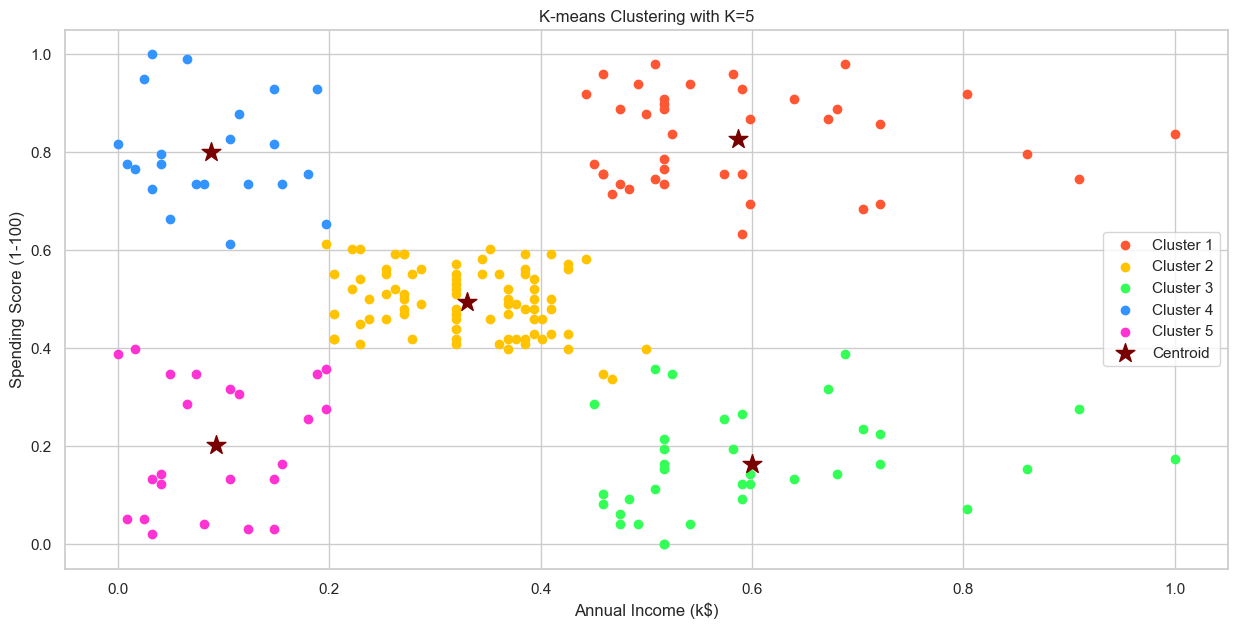

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='#FF5733', label='Cluster 1')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='#FFC300', label='Cluster 2')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='#33FF57', label='Cluster 3')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='#3394FF', label='Cluster 4')
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='#FF33D4', label='Cluster 5')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='#780000', marker='*', label='Centroid', s=200)
plt.legend()
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering with K=5')
plt.show()

#### Exercise 5

* Interpret the results and describe the characteristics of each cluster. What are the similarities and differences among the customers in each cluster? How can this information be useful for marketing or business strategies?

#### ans :

* Cluster 1 (yellow color) :  Low Income, High Spending : Customers in this cluster have low annual income but spend a lot. 
* Business Strategies: Offer budget-friendly financing options or policies.

---------------------------------------------------

* Cluster 2 (purple color) : High Income, Hign Spending : Customers in this cluster have Hign annual income and also spend a lot. They are genarally big spenders
* Business Strategies: Offer premium products ans services , also provide luxury experiences.

---------------------------------------------------

* Cluster 3 (green color) : Average Income, Average Spending : Customers in this cluster moderate income and average spending, These customers are the middle-class and may be budget-conscious.
* Business Strategies: Offer promotions, discounts, and budget-friendly products to suit their budget.

---------------------------------------------------

* Cluster 4 (blue color) : Low Income, Low Spending : Customers in this cluster have low annual income and also spend less according to need. They may be very budget-conscious or have limited spending options.
* Business Strategies: Focus on value-oriented products, discounts, or policies.

---------------------------------------------------

* Cluster 5 (red color) : Hign Income, Low Spending : Customers in this cluster have a high annual income but tend to spend relatively less. They might be considered "Savers".
* Business Strategies: Target them with investment opportunities, savings plans, or exclusive high-end products.

## Optional Challenge

#### Objective: To apply the K-means clustering algorithm on an image dataset of flowers and segment the images into different regions based on the color of the pixels.

<div>
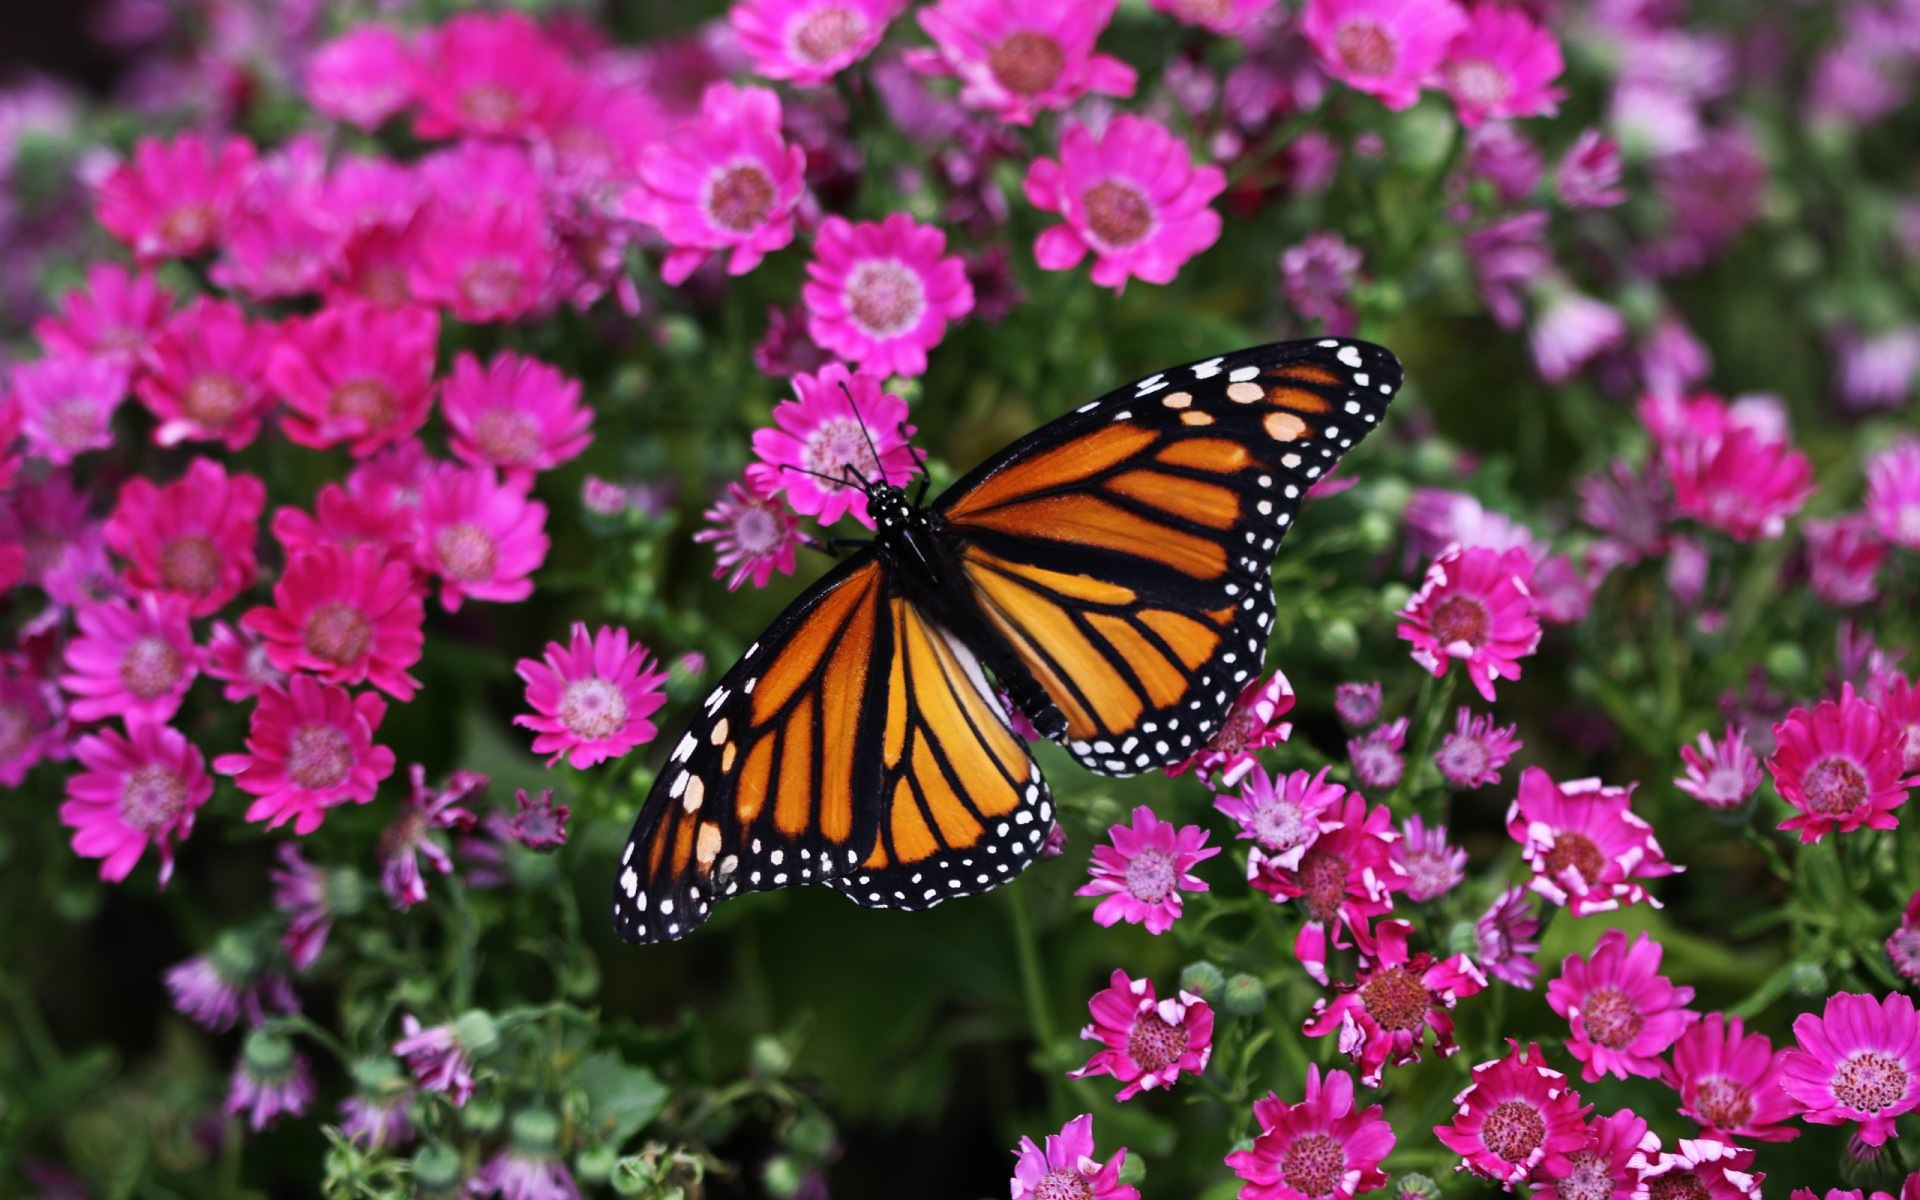
</div>

* Plot some original and segmented images side by side and compare the results. How well does the K-means algorithm segment the images based on the color of the pixels? What are some advantages and disadvantages of using K-means for image segmentation?

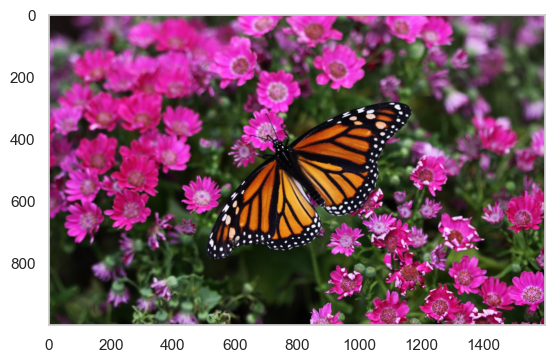

In [28]:
img = plt.imread(r"C:\Users\raval\Downloads\WhatsApp Image 2023-10-30 at 10.02.49 PM.jpeg")
plt.grid(False)
plt.imshow(img)

In [29]:
img.shape

(1000, 1600, 3)

In [30]:
# reshaping image in 2D form

data = img / 255.0
data = data.reshape(img.shape[0] * img.shape[1], img.shape[2])
data.shape

(1600000, 3)

In [31]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

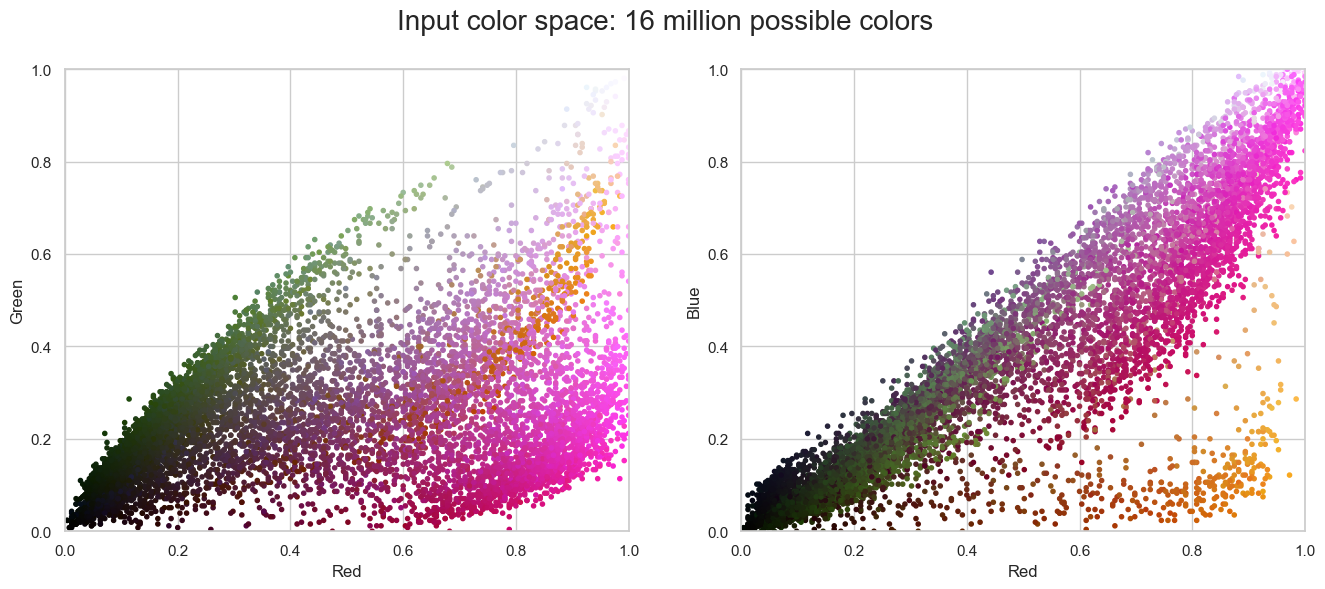

In [33]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [34]:
import warnings
warnings.simplefilter('ignore')

In [35]:
kmeans = KMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

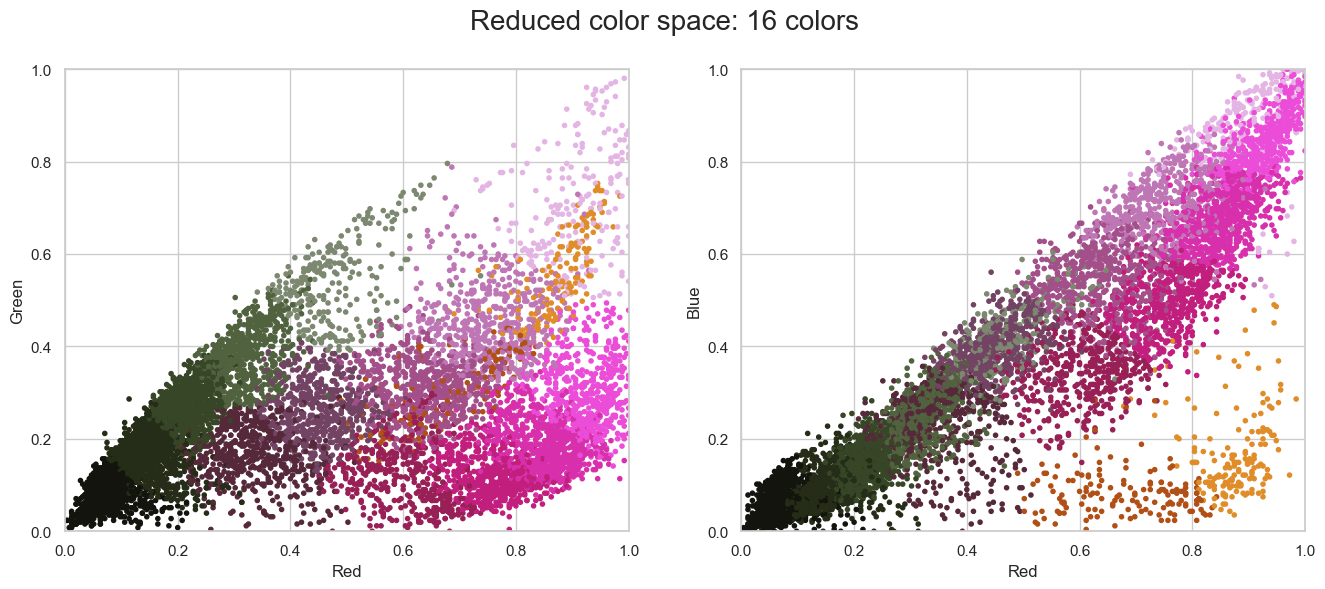

In [36]:
plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

In [37]:
img_recolored = new_colors.reshape(img.shape)

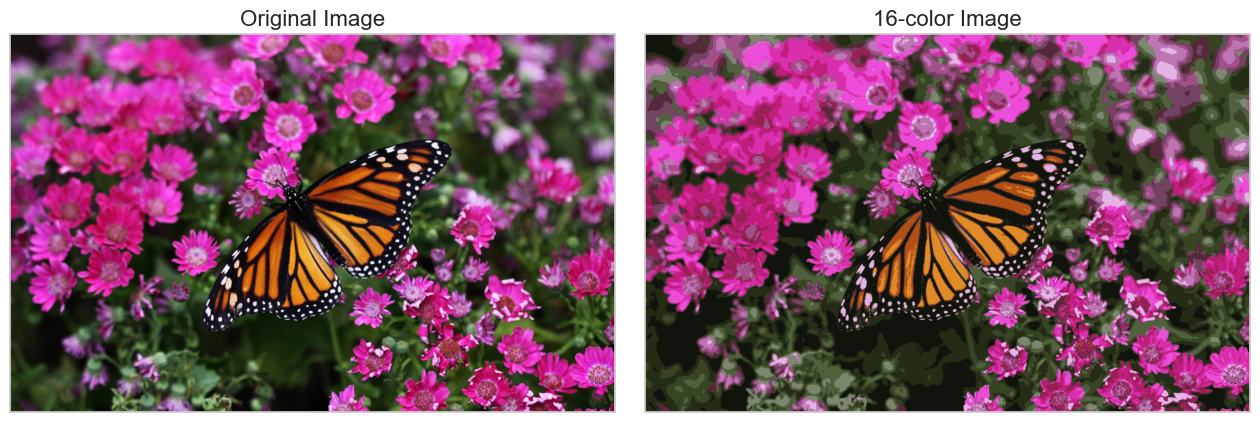

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('16-color Image', size=16);